In [43]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re

In [44]:
reviews_data=pd.read_csv("book_reviews_sample.csv")
reviews_data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


# Clean Data

In [45]:
#lowercase the text
reviews_data["cleaned_text"]=reviews_data["reviewText"].str.lower()
reviews_data.head()

,index,reviewText,rating,cleaned_text
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny. a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate. wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story. i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,"action, action, action! equipment keeps gettin..."
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [46]:
# remove punctuation
reviews_data["cleaned_text"] = reviews_data["cleaned_text"].apply(
  lambda x: re.sub(r'[^\w\s]', '', x)
)
reviews_data["cleaned_text"]

0     clean and funny a bit busy with all the differ...
1     alex a sexy hot cop and the phd candidate what...
2     good thing that this is a free story i read it...
3     action action action equipment keeps getting b...
4     this was hands down the worse book i have ever...
                            ...                        
95    love this author i have read most of her books...
96    this book was not bad i like the storyline  th...
97    this is part of a series i read and i loved th...
98    finally a texas newspaper in kindle formatway ...
99    tj and jon are very hot in this book  christin...
Name: cleaned_text, Length: 100, dtype: object

# Rule-based sentiment with VADER

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

reviews_data["sentiment_scores"] = reviews_data["cleaned_text"].apply(
  lambda x: analyzer.polarity_scores(x)["compound"]
)

reviews_data.head()

,index,reviewText,rating,cleaned_text,sentiment_scores
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


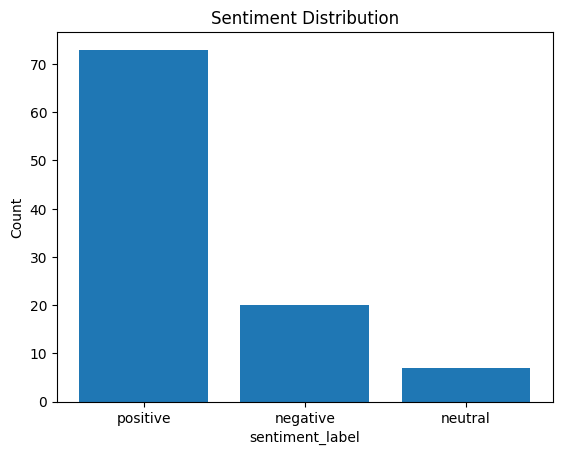

[('positive', 73), ('negative', 20), ('neutral', 7)]

In [48]:
bins=[-1,-0.01,0.01,1]
names=["negative","neutral","positive"]

reviews_data["sentiment_label"]=pd.cut(reviews_data["sentiment_scores"],bins=bins,labels=names)

count = Counter(reviews_data["sentiment_label"]).most_common()
labels, values = zip(*count)
# or :
#labels = list(count.keys())
#values = list(count.values())
# the best is to use zip()+ most_common() why ? because it is more efficient and faster

plt.bar(labels, values)
plt.title("Sentiment Distribution")
plt.xlabel("sentiment_label")
plt.ylabel("Count")
plt.show()
count

# Pre-Trained transformers

In [49]:
from transformers.pipelines import pipeline

In [51]:
transformer_pipeline=pipeline("sentiment-analysis") # type: ignore

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [62]:
transformer_labels=[
  transformer_pipeline(review)[0]["label"]
  for review in reviews_data["cleaned_text"].values
]
reviews_data["transformer_sentiment_labels"]=transformer_labels
reviews_data.head()


,index,reviewText,rating,cleaned_text,sentiment_scores,sentiment_label,transformer_sentiment_labels
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive,POSITIVE
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive,POSITIVE
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive,NEGATIVE
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive,NEGATIVE
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative,NEGATIVE


<BarContainer object of 2 artists>

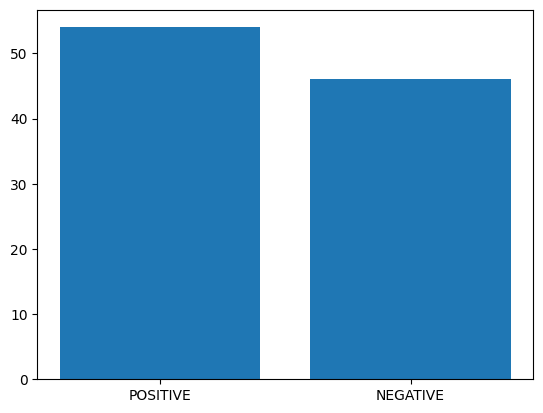

In [ ]:
count=Counter(reviews_data["transformer_sentiment_labels"])
labels, values = zip(*count.most_common())
plt.bar(labels, values)
plt.xlabel("Sentiment")
plt.ylabel("Count")